In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import os
#Main = os.getcwd()
Main = "/content/drive/MyDrive/FireDetection"
print(Main)

/content/drive/MyDrive/FireDetection


In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.3/78.2 GB disk)


In [ ]:
!mkdir {Main}/dataset
%cd {Main}/dataset



mkdir: cannot create directory ‘/content/drive/MyDrive/FireDetection/dataset’: File exists
/content/drive/MyDrive/FireDetection/dataset


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:

!pip install roboflow


from roboflow import Roboflow
rf = Roboflow(api_key="9wRoAd9MmhSwfkQrdBco")
project = rf.workspace("custom-thxhn").project("fire-wrpgm")
dataset = project.version(8).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.2 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=3172212d412c178a07d091cf08d28a5468b7589b9cdc7256b529fbcb4111954f
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      Successfully uninstalled pyparsing-3.1.0
  Attempting uninstall: idna
    Found e

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to fire-8 in yolov8:: 100%|██████████| 1970/1970 [00:12<00:00, 160.05it/s]


In [ ]:
%cd {Main}


/content/drive/MyDrive/FireDetection


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/FireDetection/fire-8/data.yaml epochs=25 imgsz=800 plots=True

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/drive/MyDrive/FireDetection/fire-8/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynami

In [ ]:
!ls /content/drive/MyDrive/FireDetection/runs/detect/train/

args.yaml  events.out.tfevents.1689588391.3061e95126f7.5543.0  weights


/content/drive/MyDrive/FireDetection


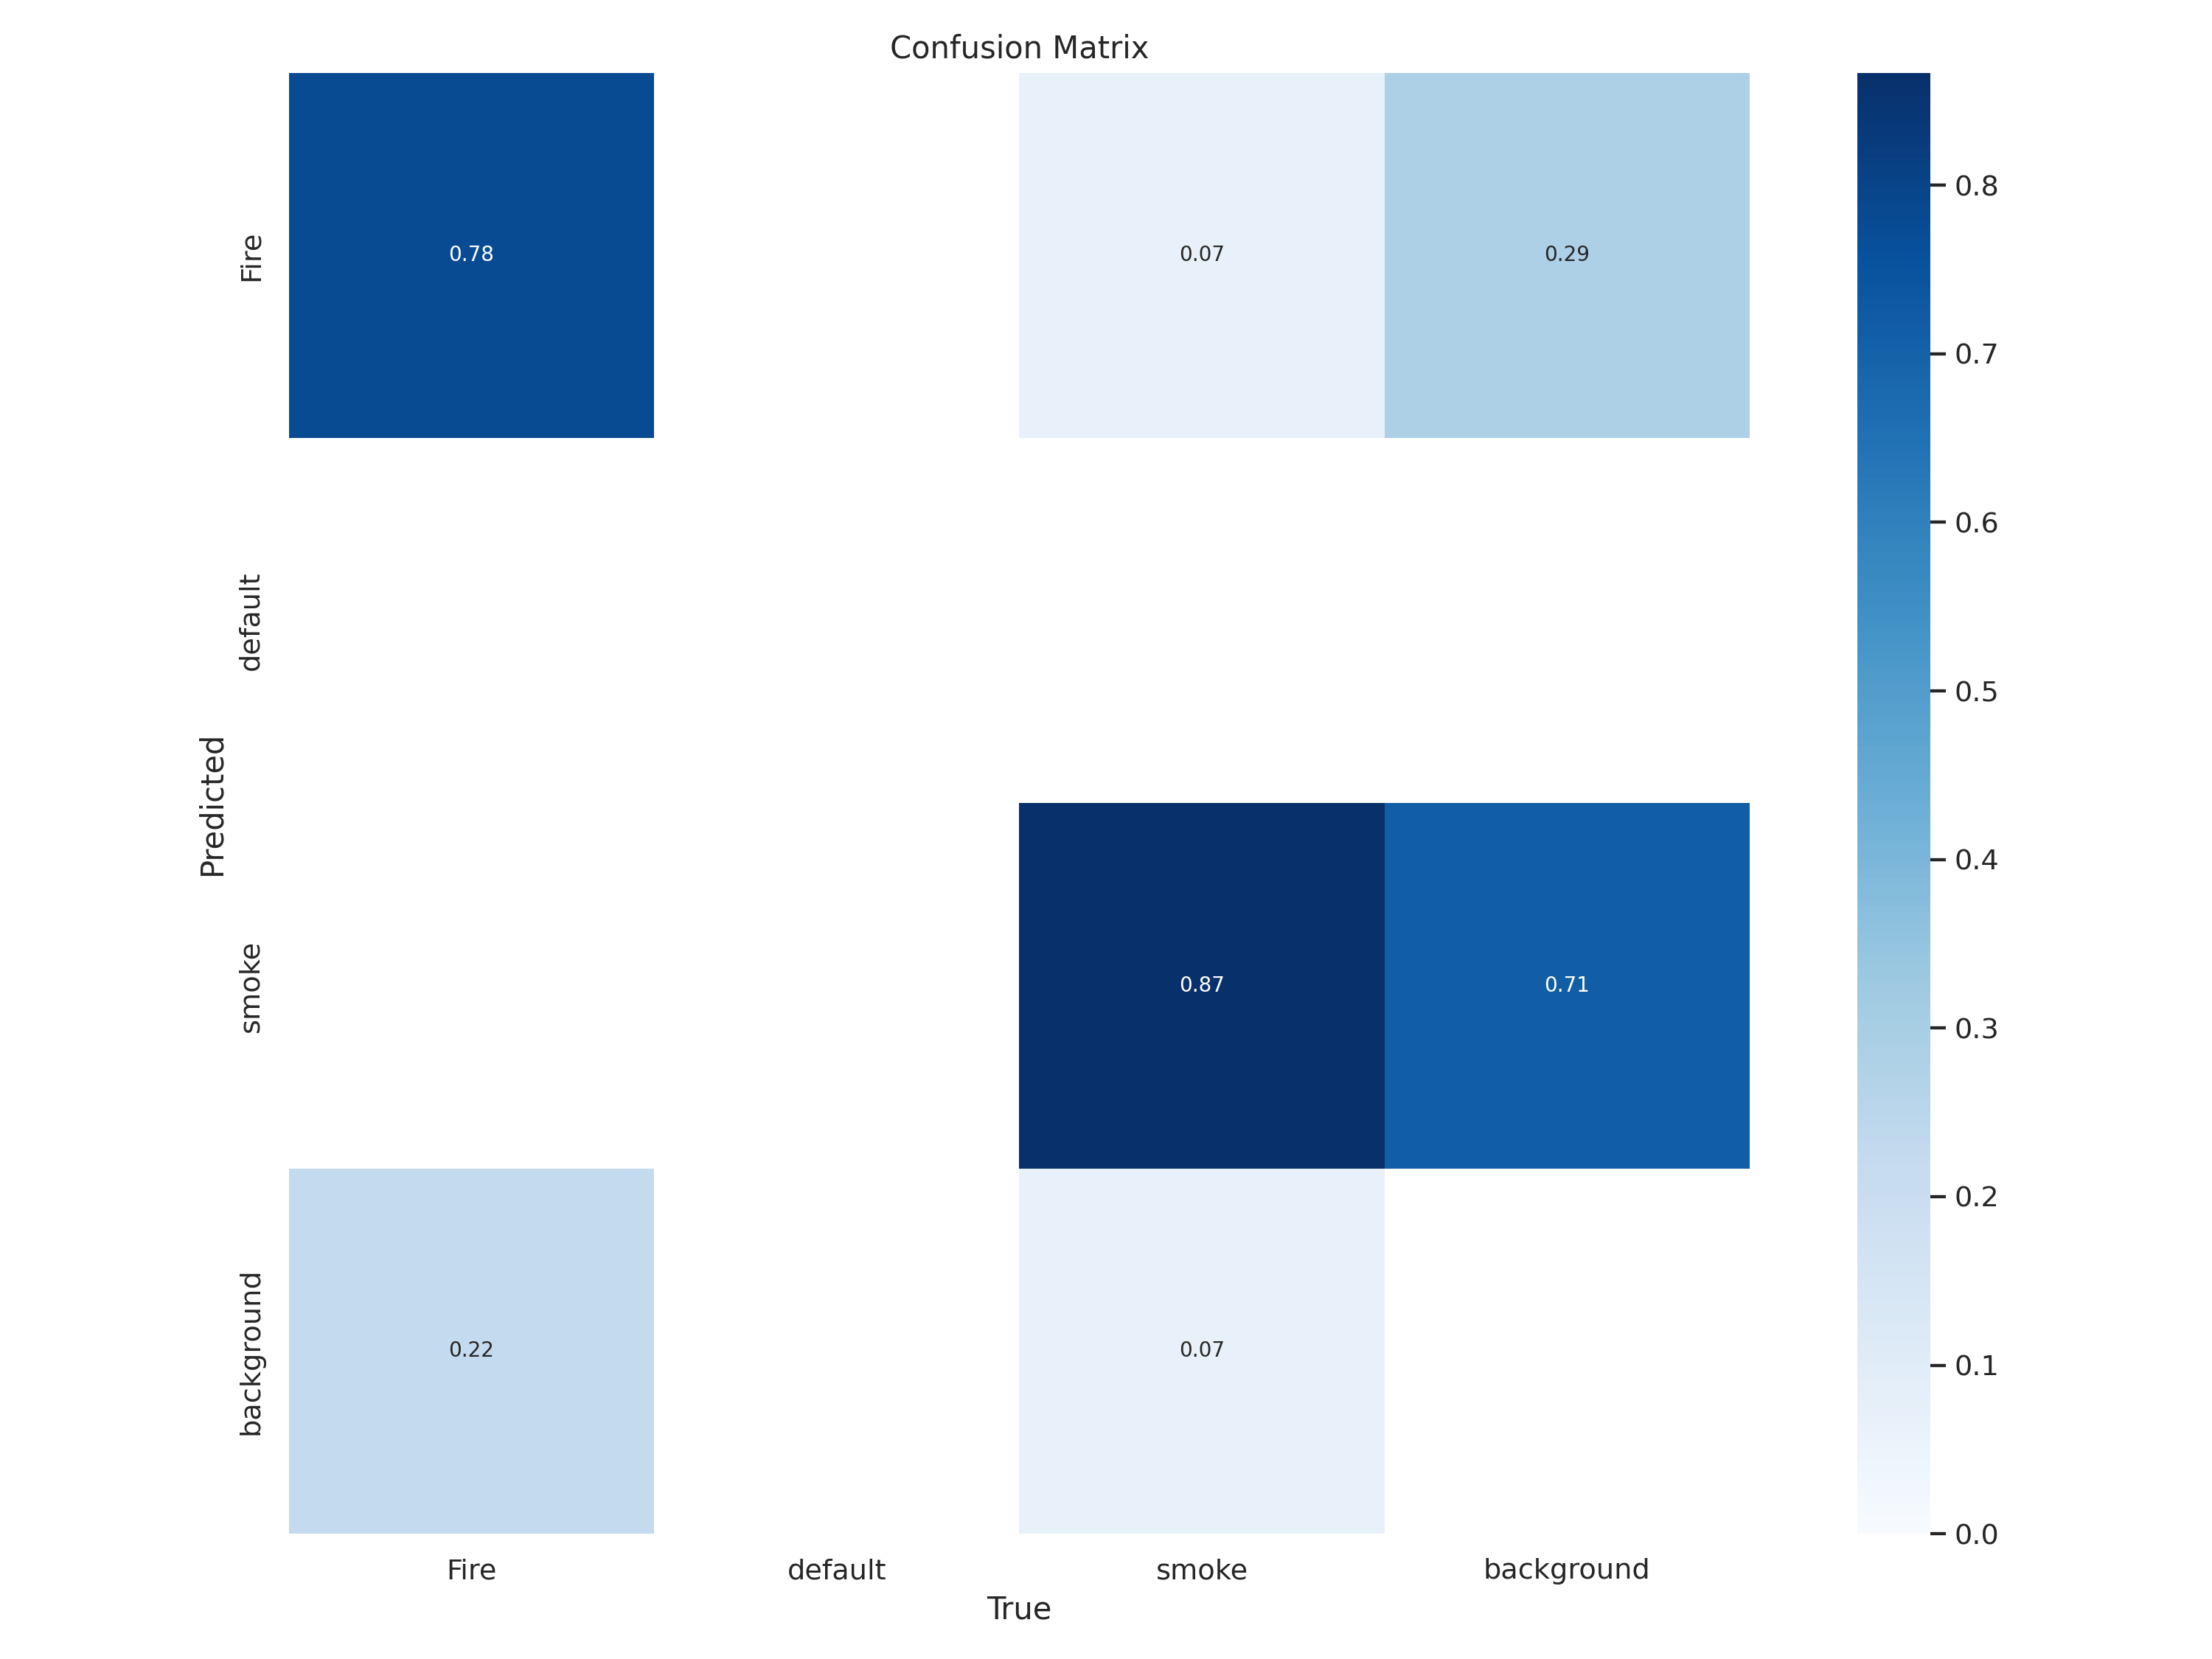

In [ ]:
%cd {Main}
Image(filename=f'{Main}/runs/detect/train13/confusion_matrix.png', width=1000)

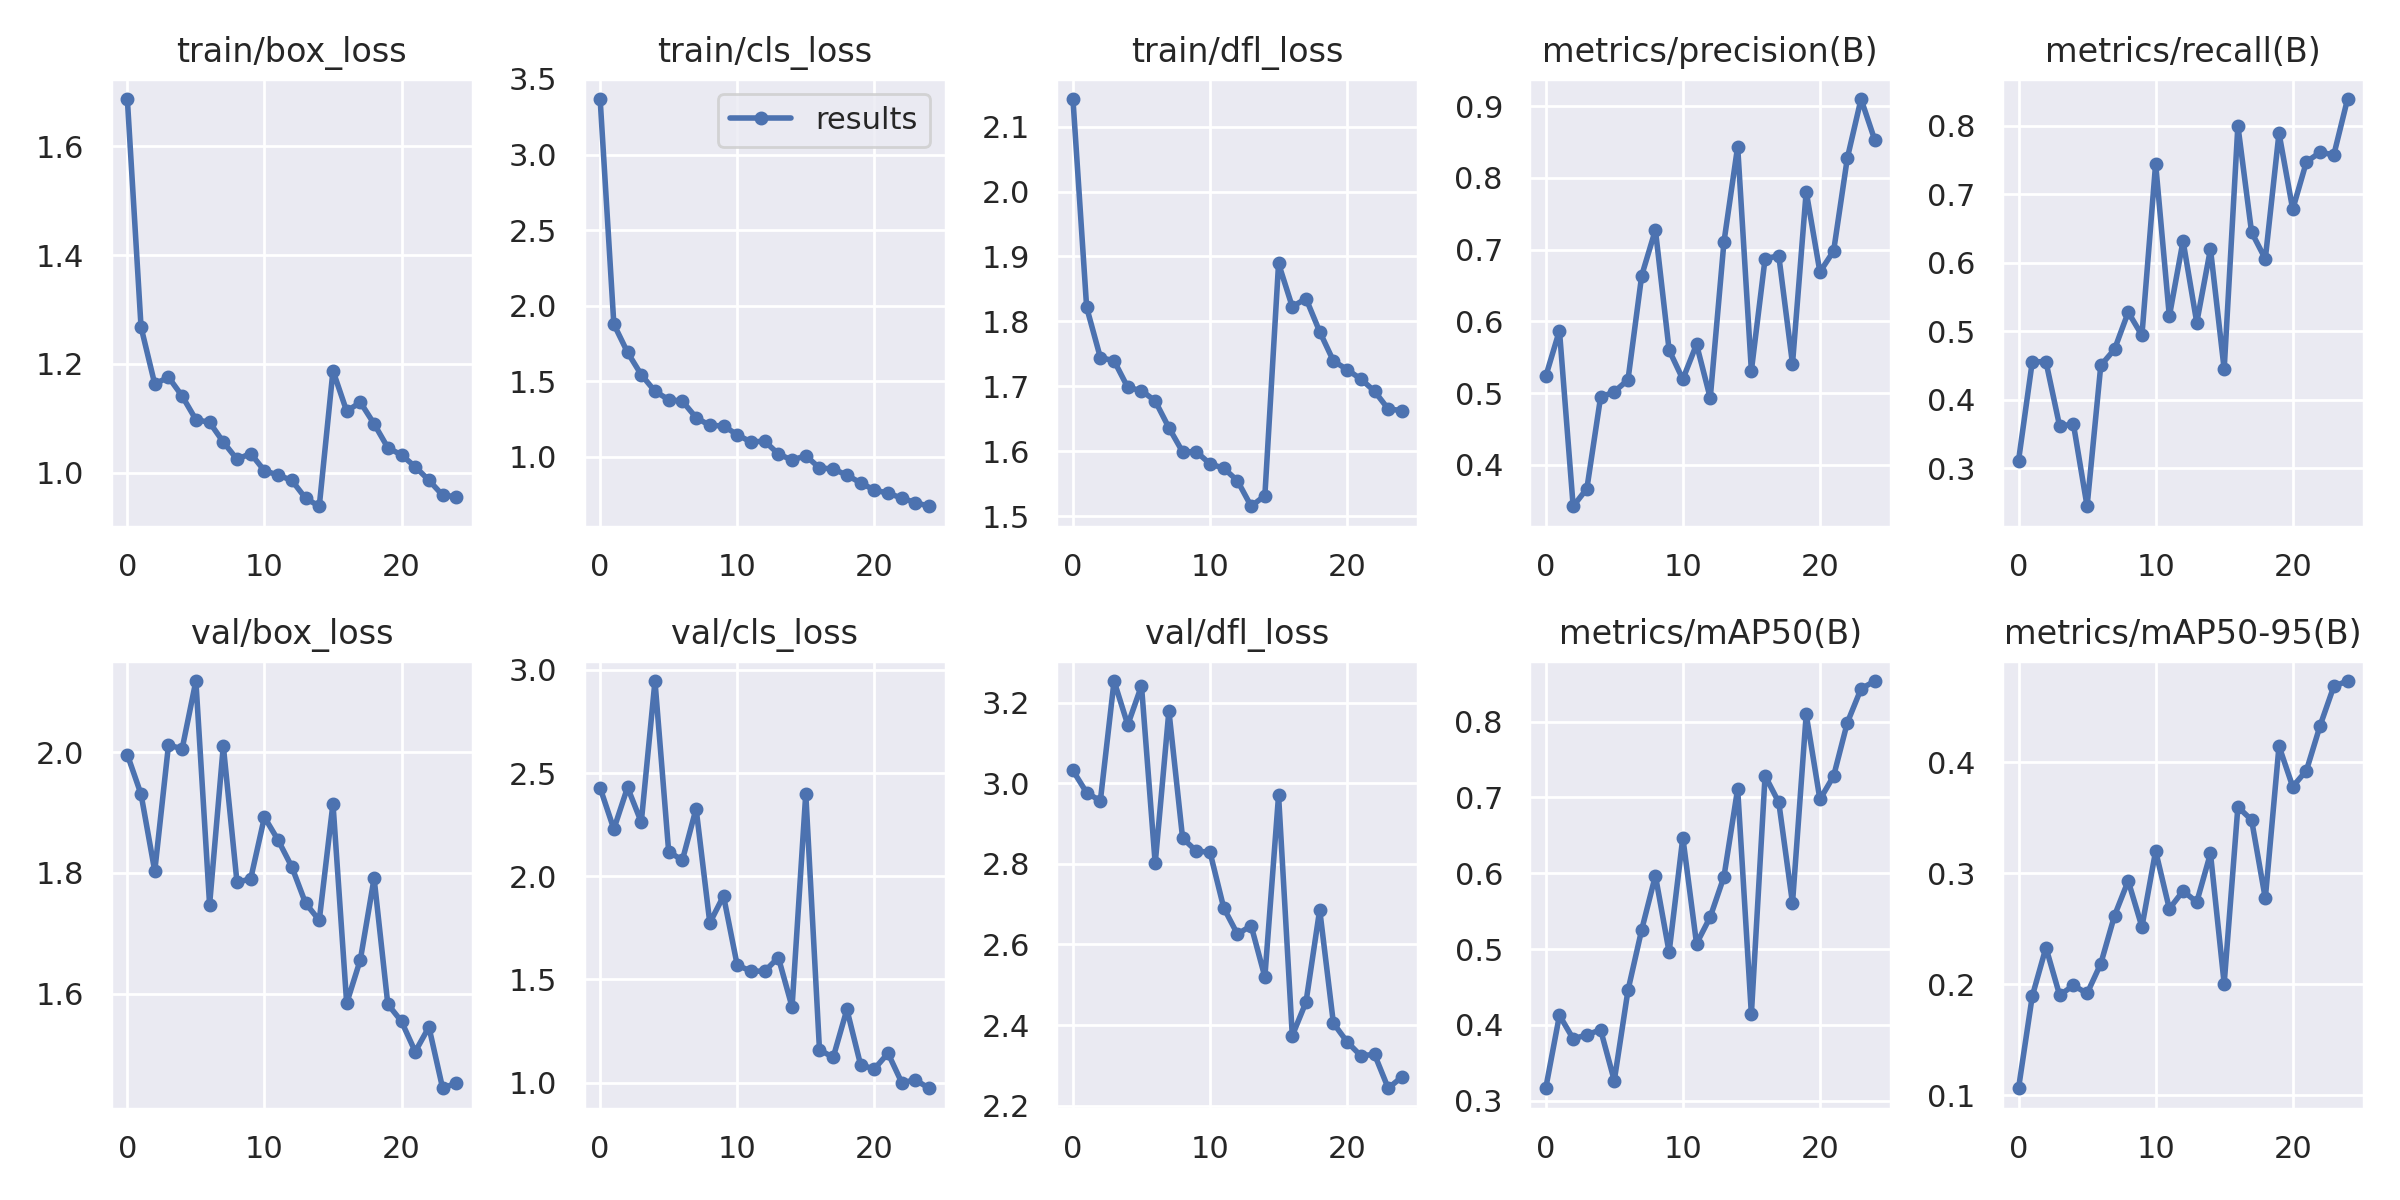

In [ ]:

Image(filename=f'{Main}/runs/detect/train13/results.png', width=1000)

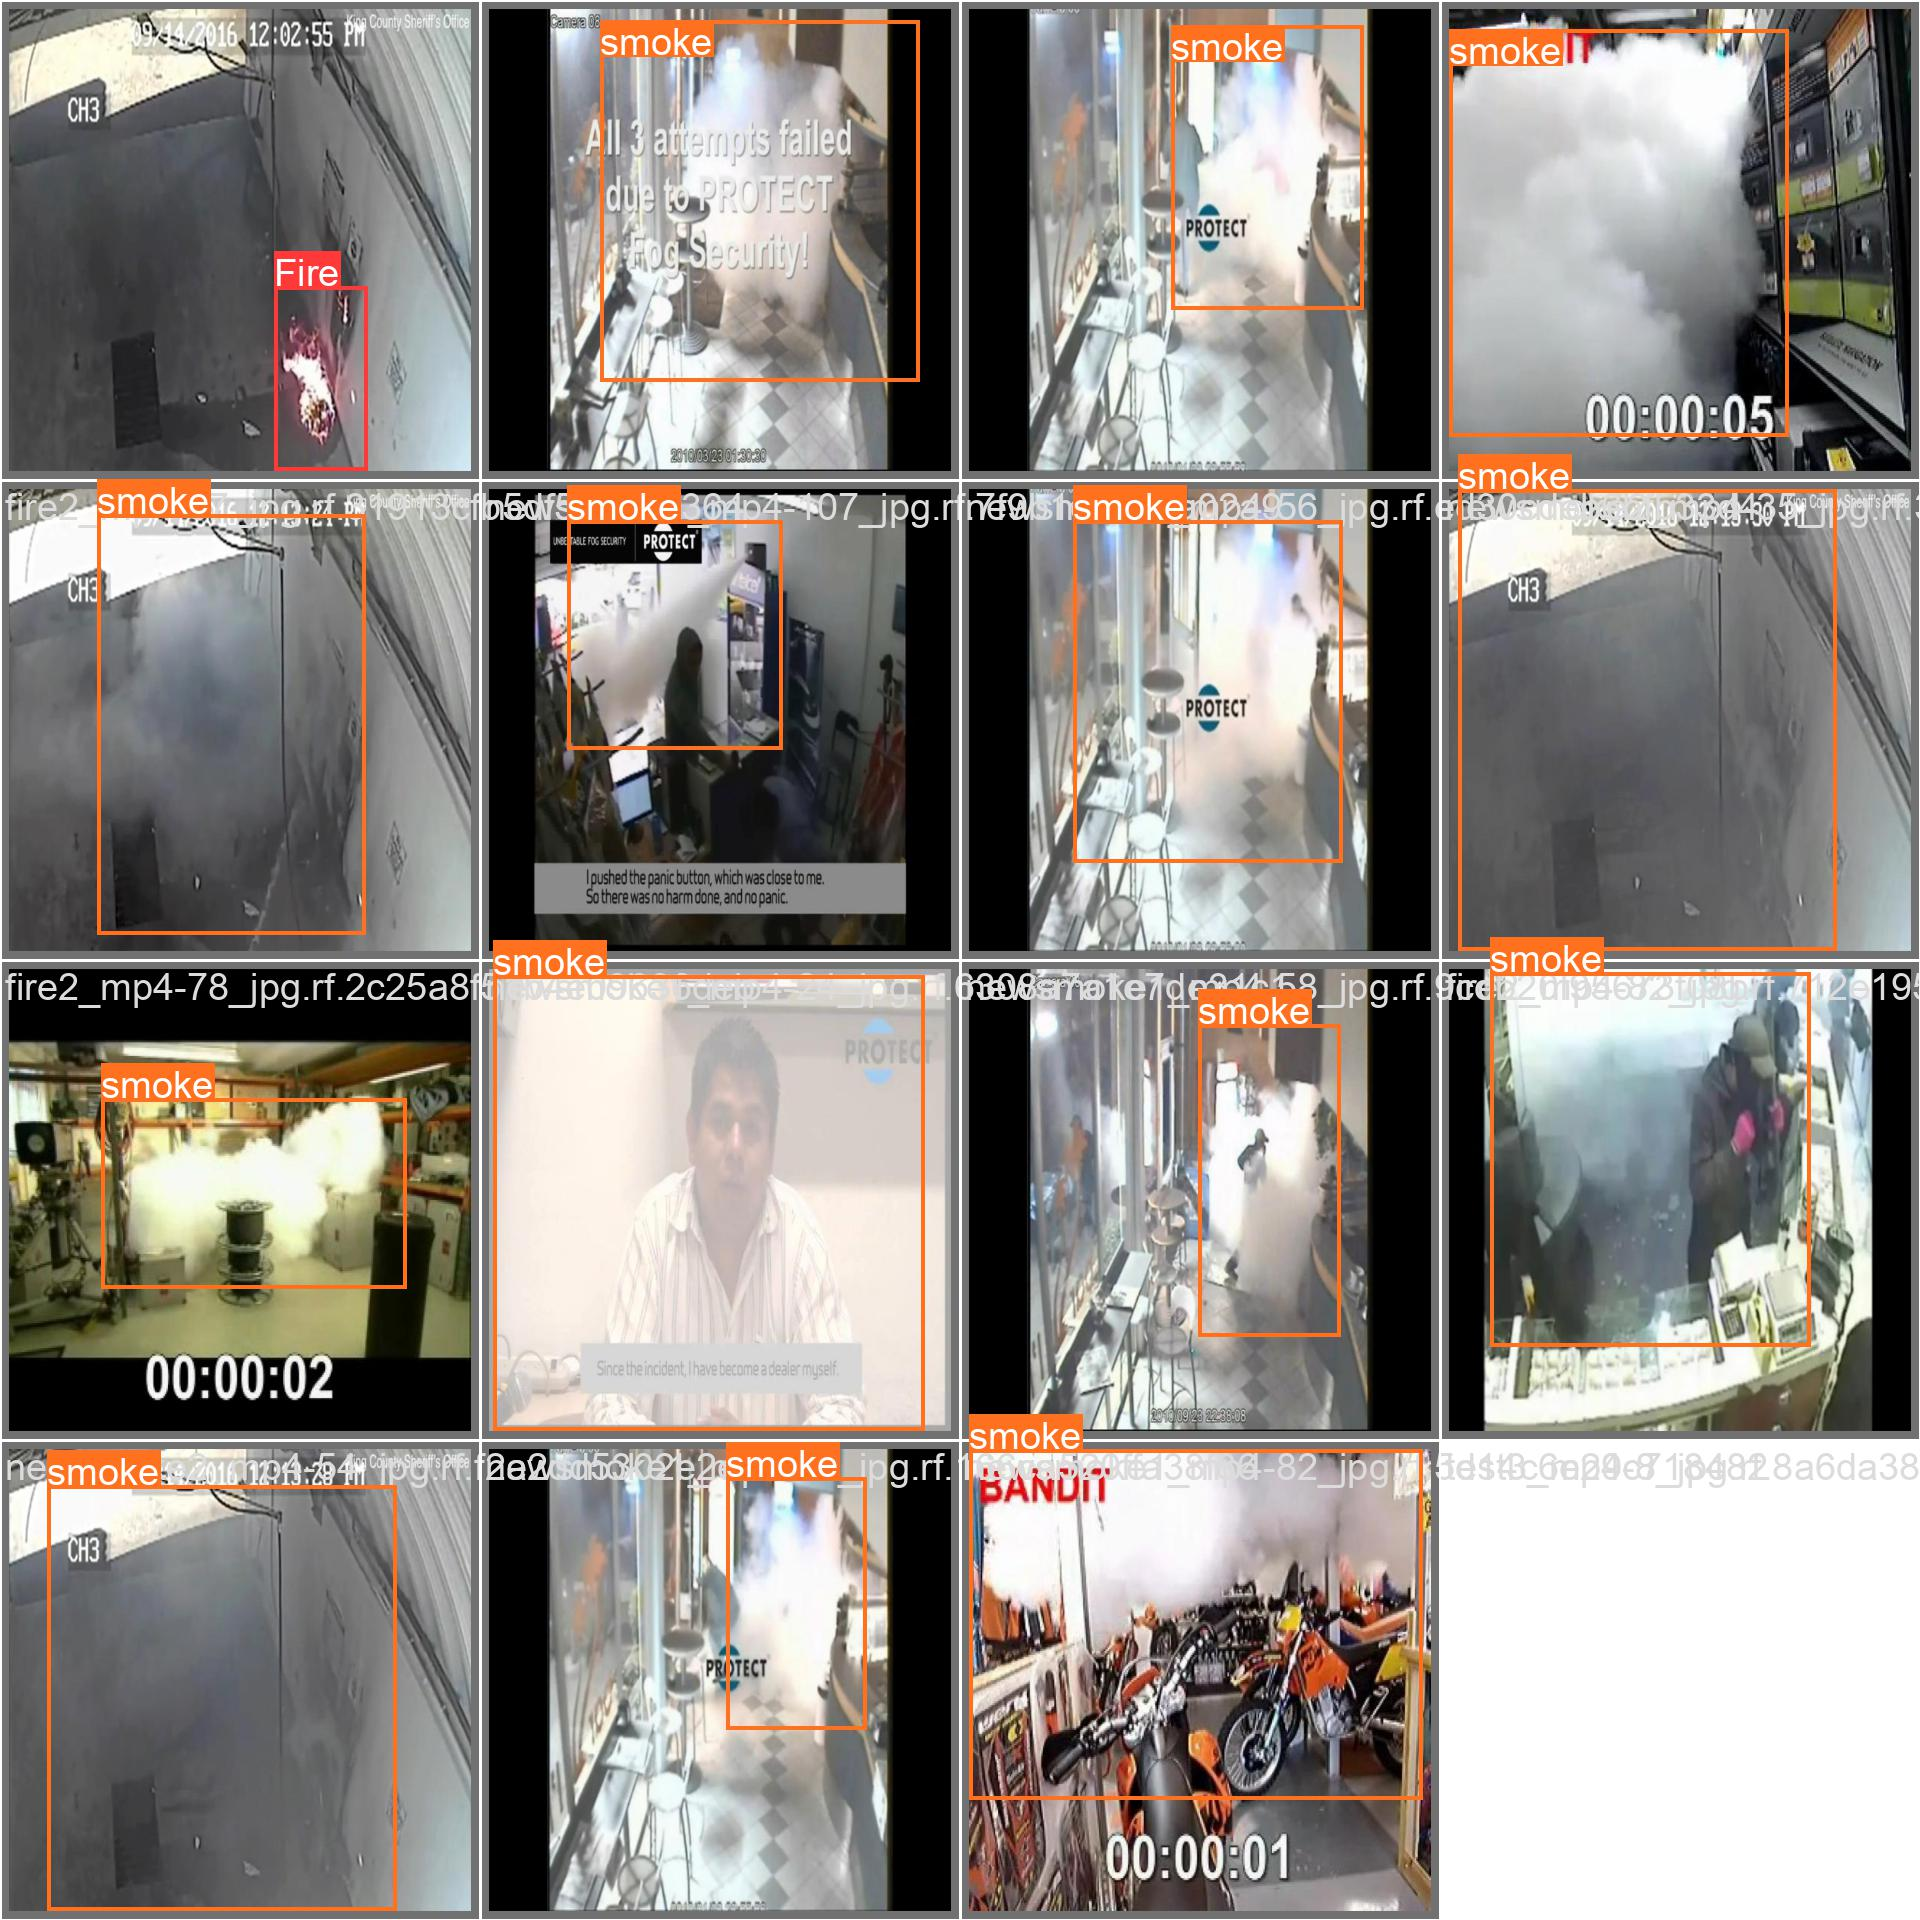

In [ ]:

Image(filename=f'/content/drive/MyDrive/FireDetection/runs/detect/train13/val_batch1_labels.jpg', width=1000)


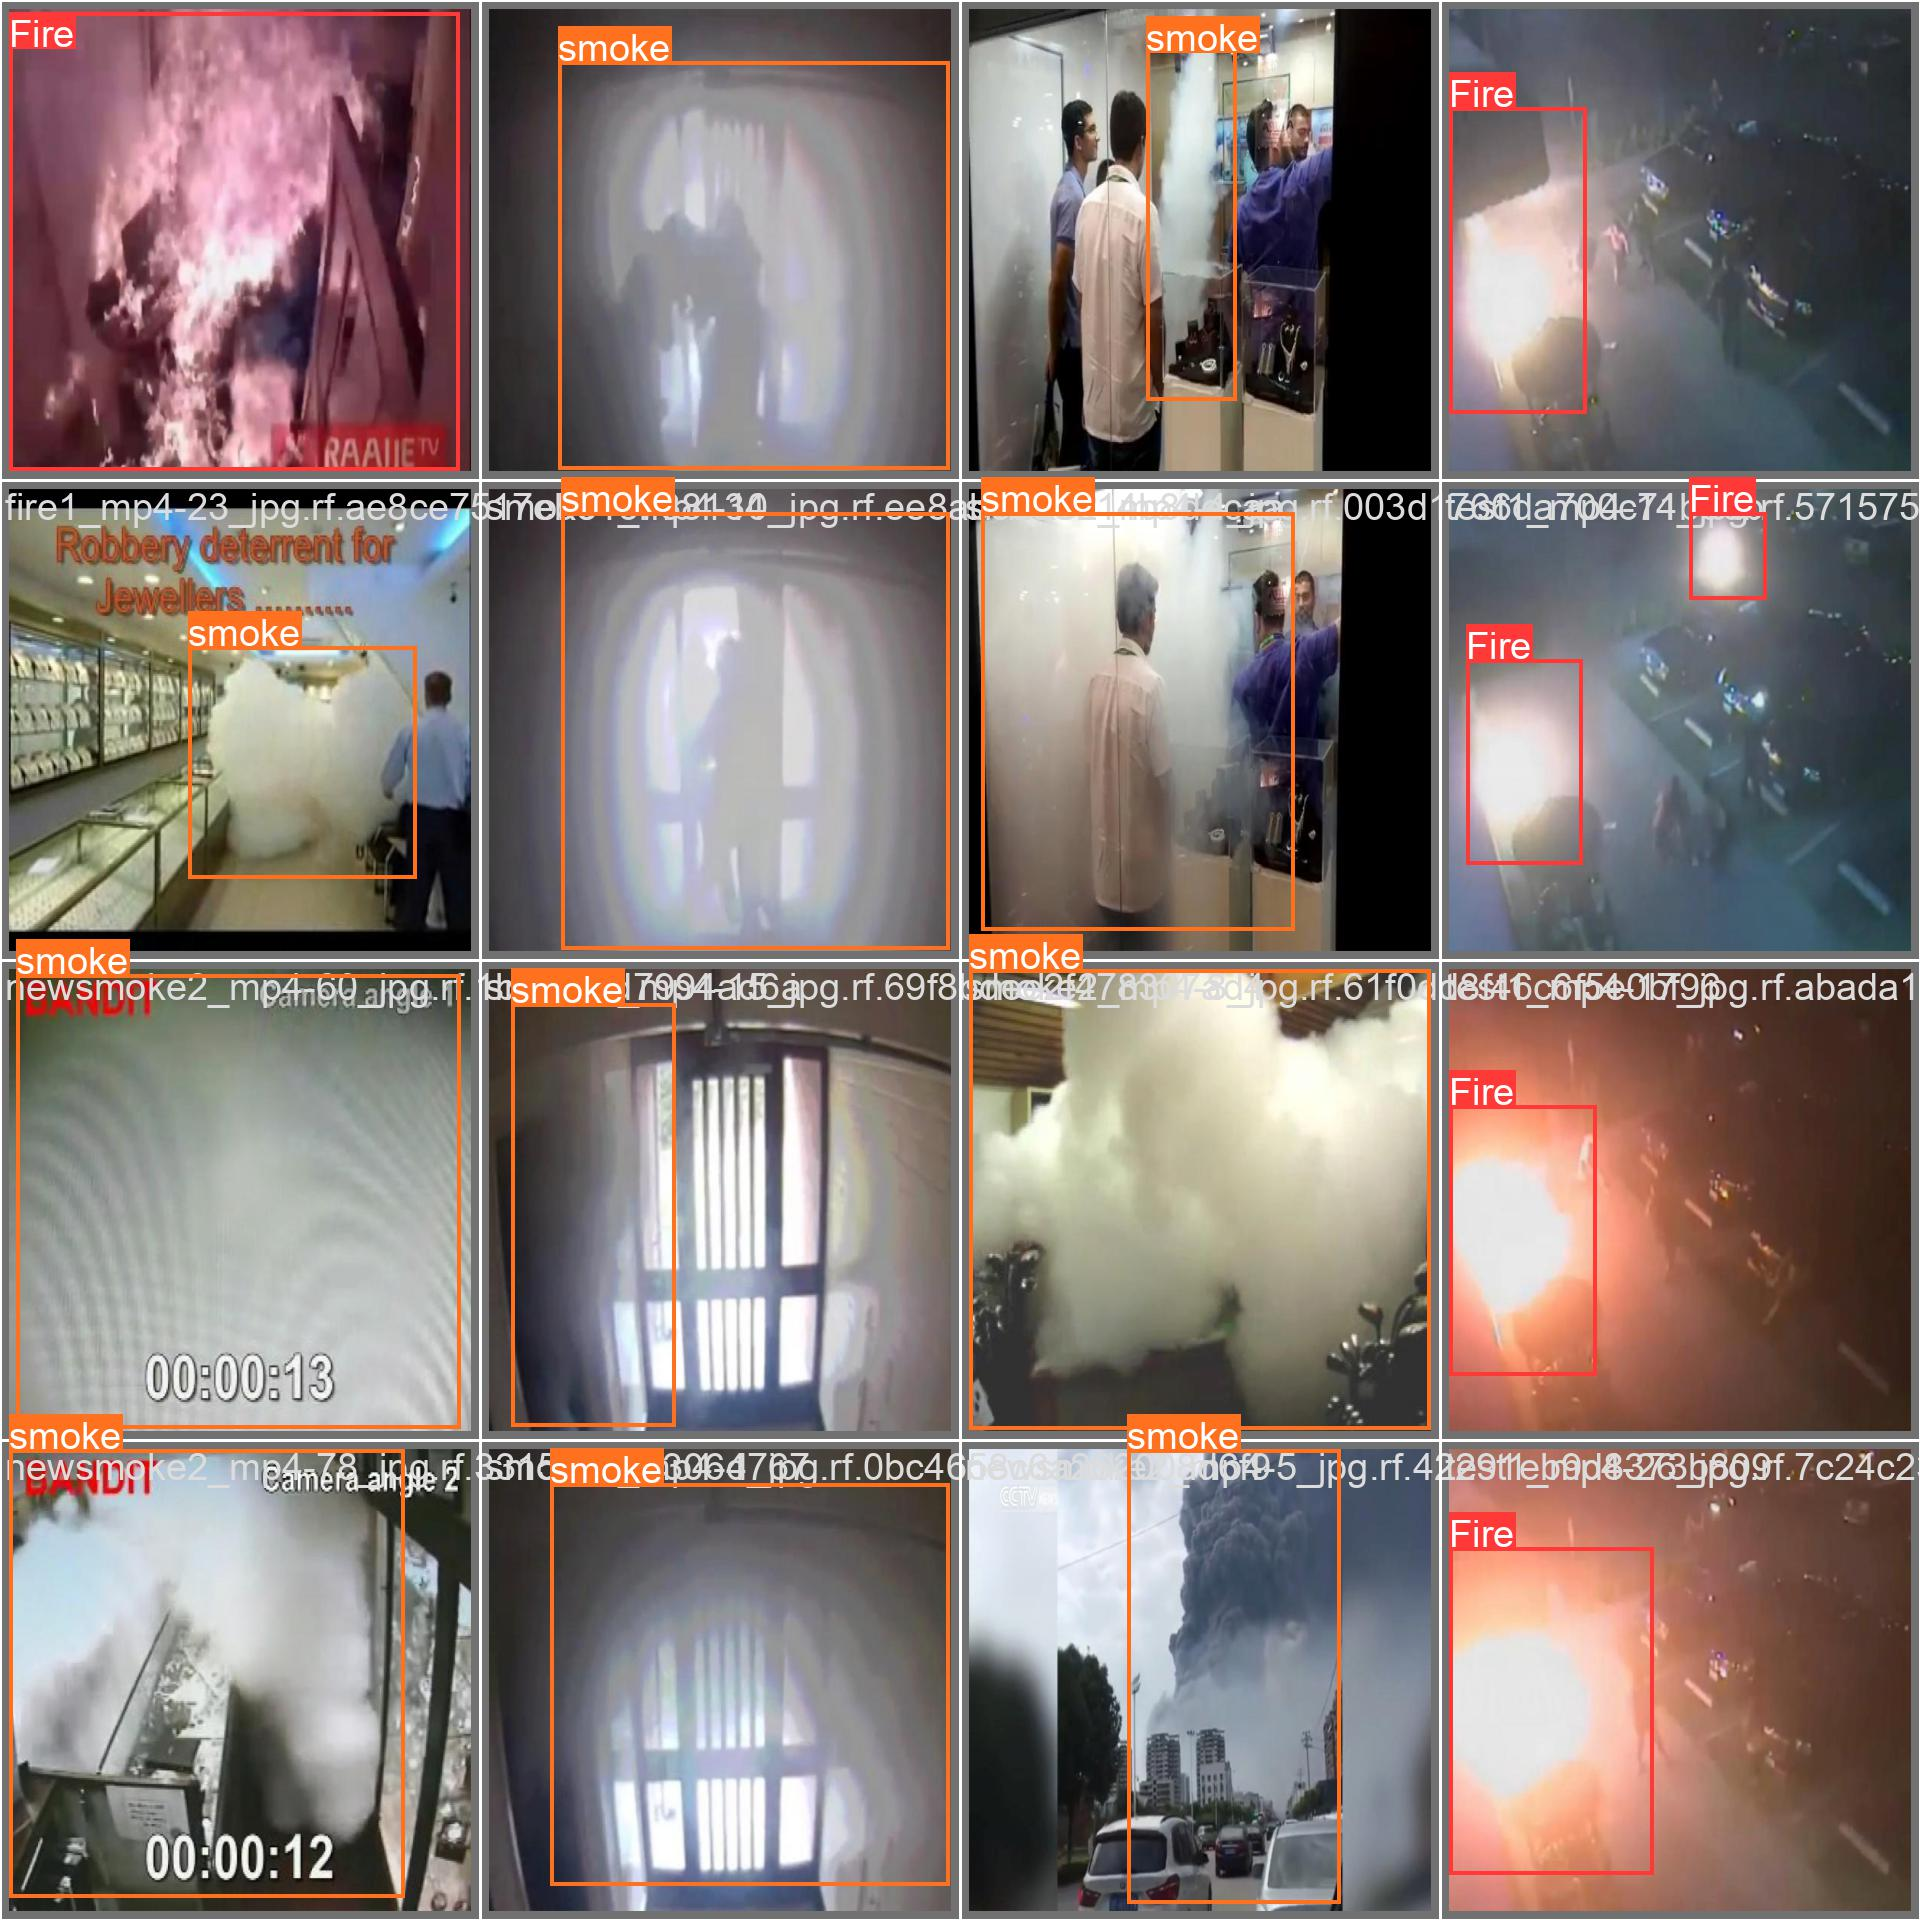

In [ ]:
Image(filename=f'/content/drive/MyDrive/FireDetection/runs/detect/train13/val_batch0_labels.jpg', width=1000)

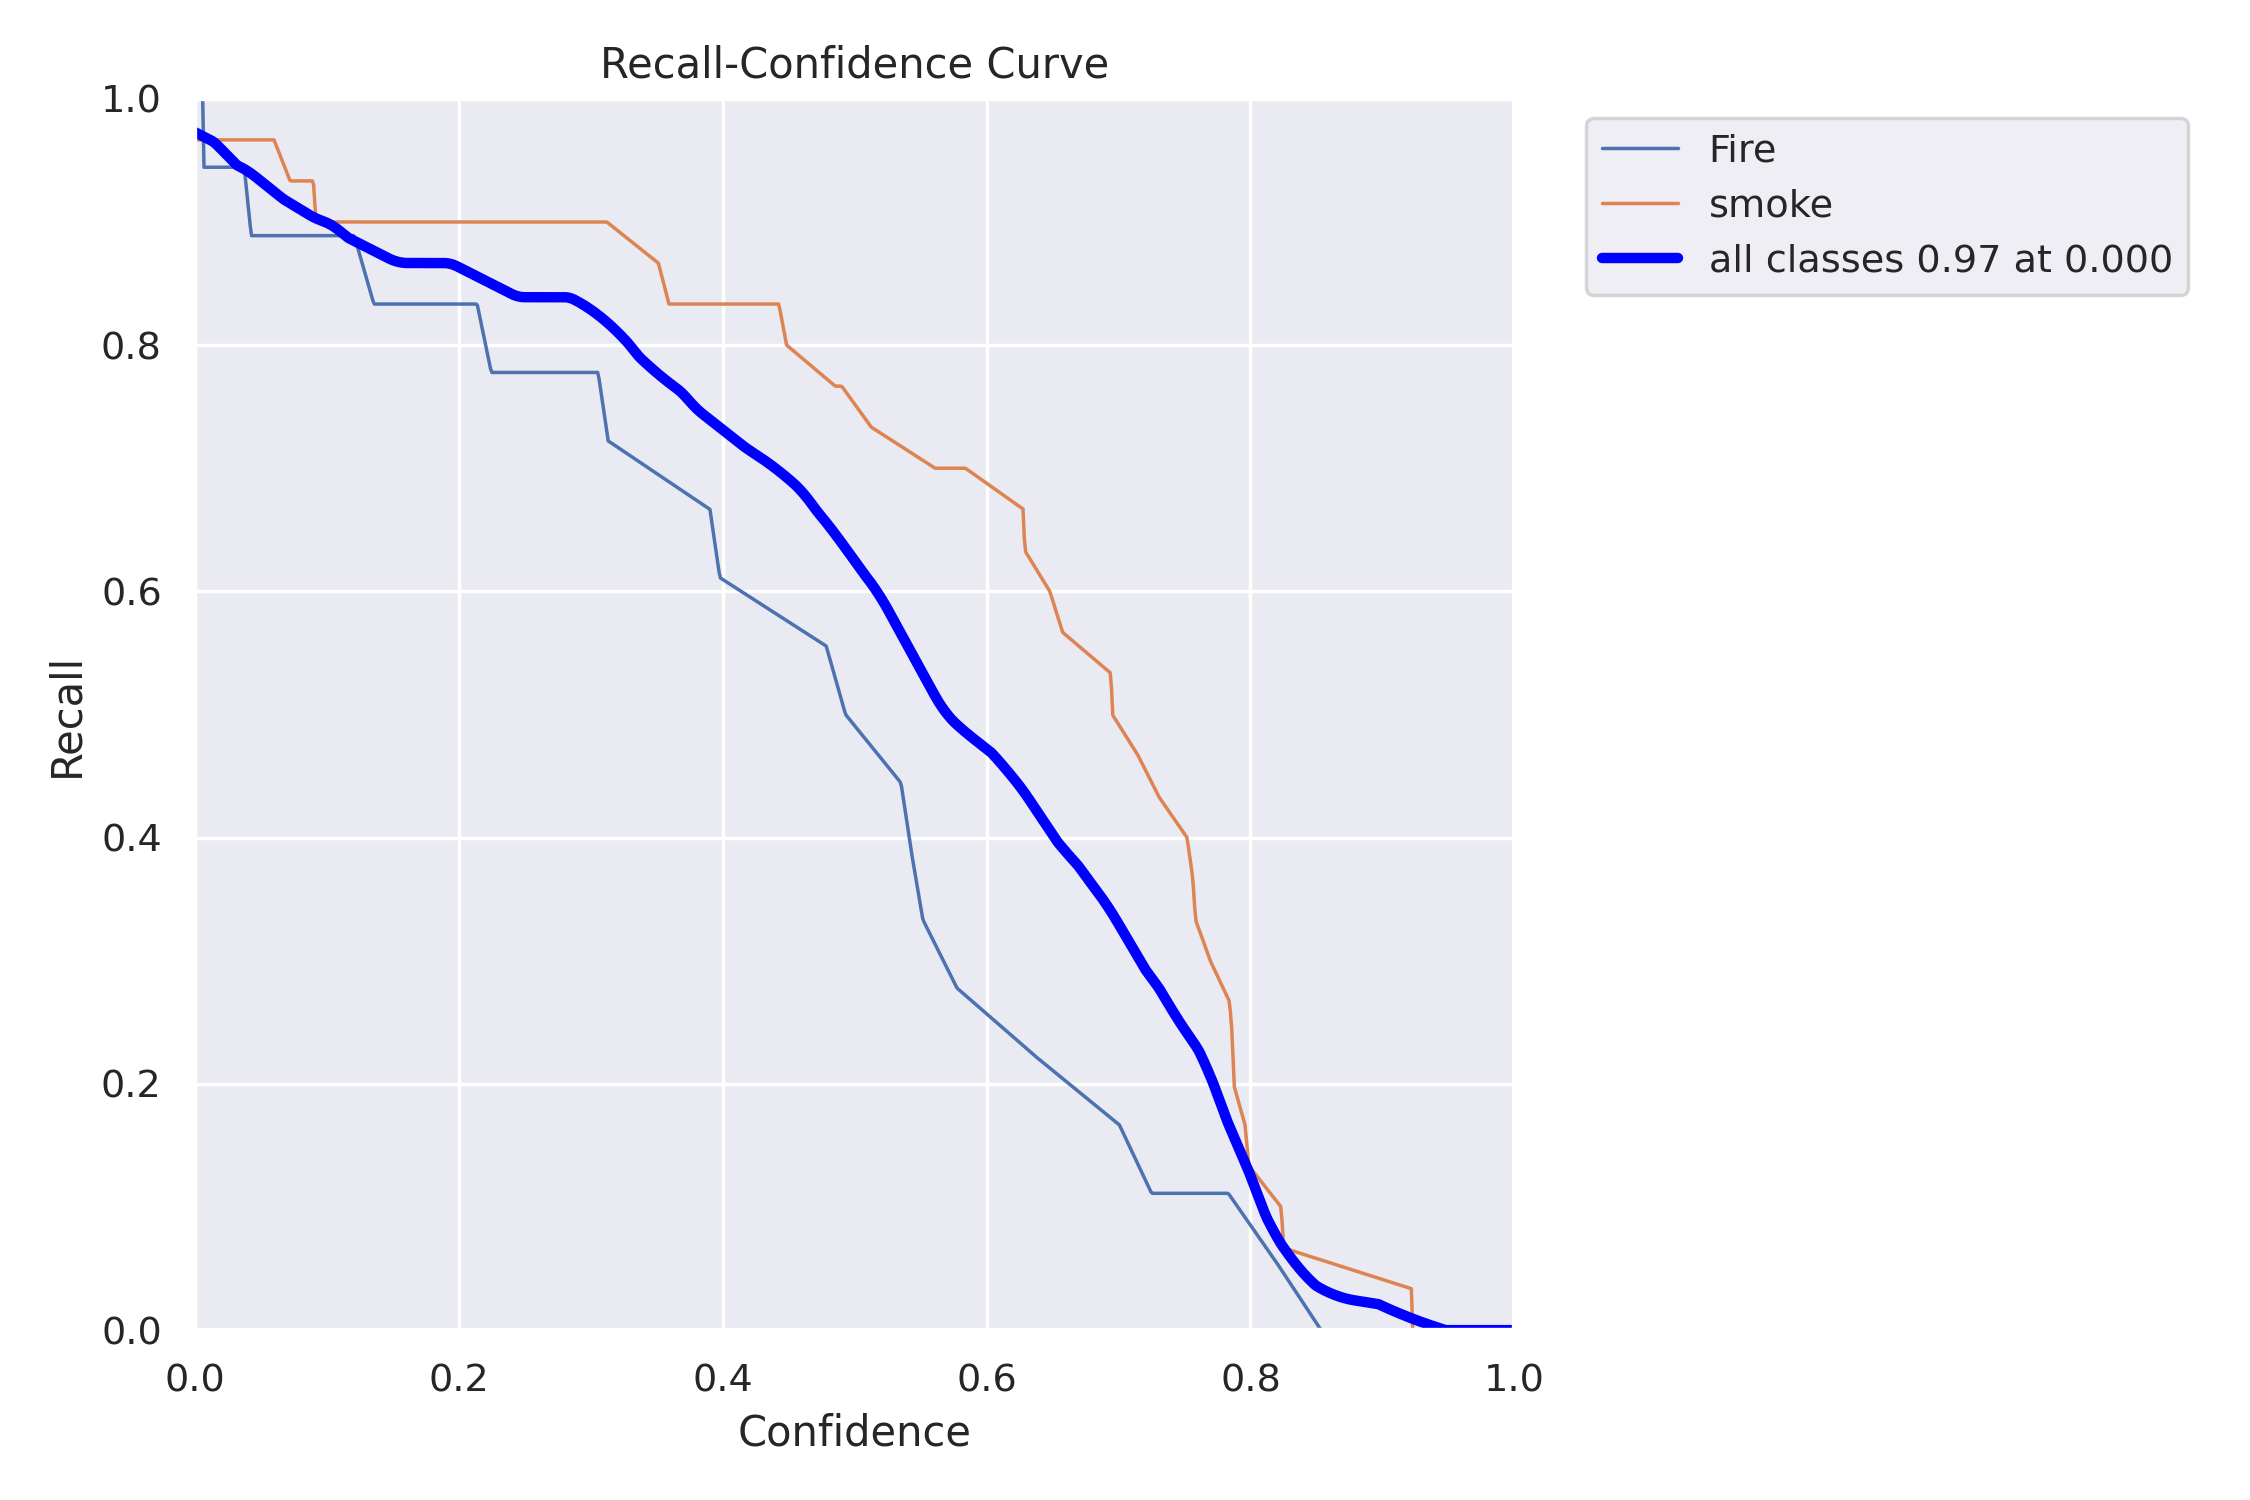

In [ ]:
Image(filename=f'/content/drive/MyDrive/FireDetection/runs/detect/train13/R_curve.png', width=1000)

In [ ]:
!yolo task=detect mode=predict model={Main}/runs/detect/train13/weights/best.pt conf=0.6 source=/content/drive/MyDrive/FireDetection/fire-8/test/images save=True

2023-07-18 16:41:54.493978: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-18 16:41:55.427989: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/55 /content/drive/MyDrive/FireDetection/fire-8/test/images/fire1_mp4-26_jpg.rf.5a09c11c9facf23a9413ca63bc2a6085.jpg: 800x800 1 Fire, 24.6ms
image 2/55 /content/drive/MyDrive/FireDetection/fire-8/test/images/fire2_mp4-29_jpg.rf.42a82dddeb68db98ca428fdf902c9e66.jpg: 800x800 1 Fire, 24.7ms
image 3/55 /content/drive/MyDrive/FireDetection/fire-8/test/images/fire2_mp4-37_jpg.rf.742a554b0f077

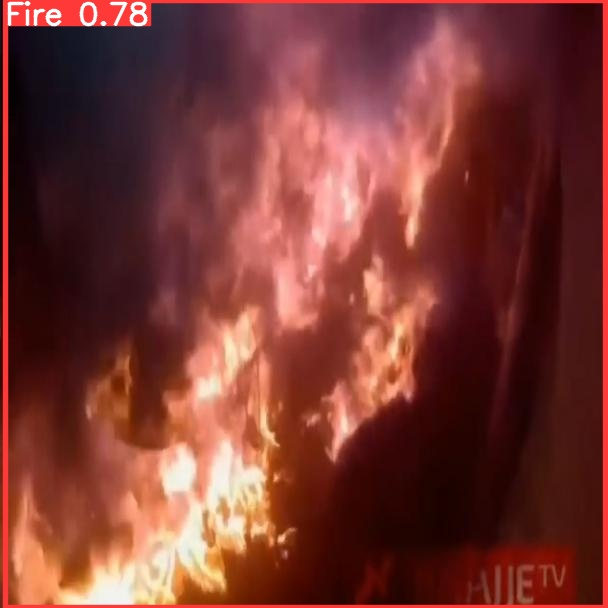

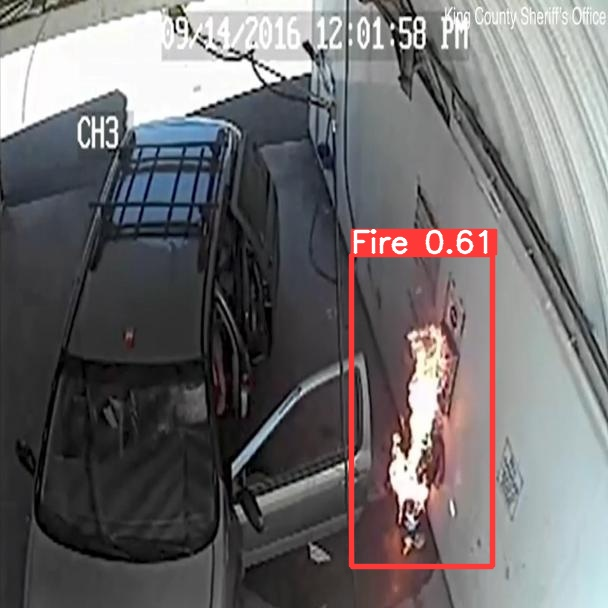

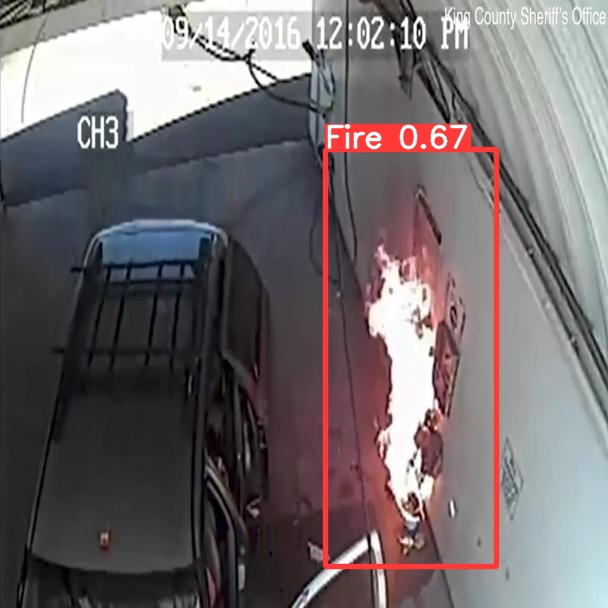

In [ ]:
import glob

for image_path in glob.glob(f'{Main}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=1000))
      print("\n")

In [ ]:
%cd {Main}
!yolo task=detect mode=predict model={Main}/runs/detect/train13/weights/best.pt conf=0.25 source=/content/drive/MyDrive/FireDetection/firevideo.mp4 save=True

/content/drive/MyDrive/FireDetection
2023-07-22 10:53:02.662826: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-22 10:53:03.511500: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/460) /content/drive/MyDrive/FireDetection/firevideo.mp4: 480x800 1 Fire, 65.7ms
video 1/1 (2/460) /content/drive/MyDrive/FireDetection/firevideo.mp4: 480x800 1 Fire, 15.4ms
video 1/1 (3/460) /content/drive/MyDrive/FireDetection/firevideo.mp4: 480x800 1 Fire, 15.4ms
video 1/1 (4/460) /content/drive/MyDrive/FireDetection/firevideo.mp4: 480x800 1 F

In [ ]:
%cd {Main}
!yolo task=detect mode=predict model={Main}/runs/detect/train13/weights/best.pt conf=0.25 source=/content/drive/MyDrive/FireDetection/smokevideo.mp4 save=True

/content/drive/MyDrive/FireDetection
2023-07-22 11:06:56.079407: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-22 11:06:56.961379: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/420) /content/drive/MyDrive/FireDetection/smokevideo.mp4: 480x800 1 Fire, 67.6ms
video 1/1 (2/420) /content/drive/MyDrive/FireDetection/smokevideo.mp4: 480x800 1 Fire, 15.5ms
video 1/1 (3/420) /content/drive/MyDrive/FireDetection/smokevideo.mp4: 480x800 1 Fire, 15.4ms
video 1/1 (4/420) /content/drive/MyDrive/FireDetection/smokevideo.mp4: 480x800

In [ ]:
%cd {Main}
!yolo task=detect mode=predict model={Main}/runs/detect/train13/weights/best.pt conf=0.25 source=/content/drive/MyDrive/FireDetection/fire3.mp4 save=True

/content/drive/MyDrive/FireDetection
2023-07-22 11:33:42.690427: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-22 11:33:44.034564: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/614) /content/drive/MyDrive/FireDetection/fire3.mp4: 480x800 60.3ms
video 1/1 (2/614) /content/drive/MyDrive/FireDetection/fire3.mp4: 480x800 15.4ms
video 1/1 (3/614) /content/drive/MyDrive/FireDetection/fire3.mp4: 480x800 15.5ms
video 1/1 (4/614) /content/drive/MyDrive/FireDetection/fire3.mp4: 480x800 15.4ms
video 1/1 (5/614) /content/drive/MyD